## Q1. Load the Dataset

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# Import necessary libraries
import pandas as pd

# Load the dataset into a pandas DataFrame
data = pd.read_csv('spam.csv', encoding='latin1')

# Display the first few rows of the DataFrame to verify data loading
print(data.head())

# Check the shape of the DataFrame to understand the size of the dataset
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
The dataset contains 5572 rows and 5 columns.


/Users/anxiousviking/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data = data.rename(columns={'v1': 'label', 'v2': 'message'}) # Rename the columns for easier understanding

# Drop any other columns
data = data[['label', 'message']] # Select only the label and message columns

In [5]:
print(data.head()) # Display the first few rows of the DataFrame to verify data loading

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [6]:
# Calculate the counts of 'ham' and 'spam'
counts = data['label'].value_counts()

# Calculate the percentages
percentages = counts / len(data) * 100

# Print the percentages
print(percentages)

label
ham     86.593683
spam    13.406317
Name: count, dtype: float64


## Q2. Provide the metric for evaluation model

Choosing F1 score for Spam Detection

Imbalanced Data Handling:
Dataset is imbalanced (86.6% ham, 13.4% spam). Accuracy alone can be misleading as a model predicting only ham would still have high accuracy. The F1 score balances precision and recall, providing a more meaningful assessment.

Balancing Precision and Recall:
Precision: Ensures that predicted spam emails are actually spam, reducing false positives.
Recall: Measures how many actual spam emails are correctly identified, minimizing false negatives.
The F1 score combines these into a single metric, reflecting both aspects.

Reflects True Performance:
In an imbalanced dataset, the F1 score highlights the model's effectiveness in distinguishing spam from ham, ensuring it identifies spam while avoiding incorrect labeling of legitimate emails.

Overall, the F1 score provides a balanced measure of performance, crucial for effective spam detection in imbalanced datasets.

## Q3: Classification Pipelines

Objective: Evaluate and compare three different classification pipelines for spam detection using a subset of the dataset. Choose the best pipeline based on model performance and learning curves, then train the final model on a larger subset.

### Intial testing with smaller subset:

In [7]:
# Load and sample a smaller subset (e.g., 10%)
subset = data.sample(frac=1, random_state=42)

# Split data into features and labels
X_subset = subset['message']
y_subset = subset['label']

In [8]:
# from sklearn.preprocessing import LabelEncoder

# # Create a label encoder
# le = LabelEncoder()

# # Fit the encoder to the 'label' column
# le.fit(y_subset)

# # Print the classes and their corresponding integer values
# for class_, integer in zip(le.classes_, range(len(le.classes_))):print(f"{class_} is represented as {integer}")

#### Pipeline 1: Sparce Embeddings

F1 Score (TF-IDF): 0.5555555555555556


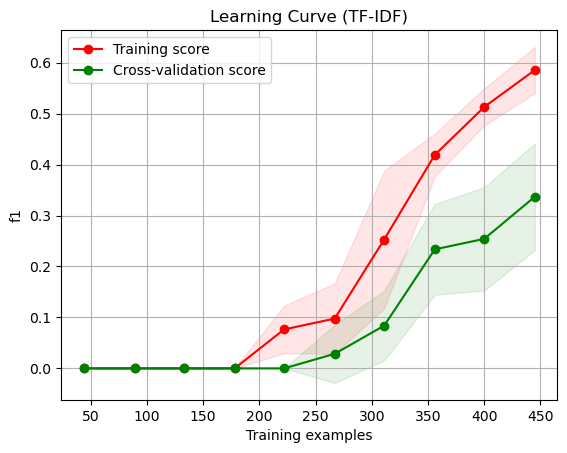

In [9]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import learning_curve
import numpy as np

# Define a function to plot learning curves
def plot_learning_curve(model, X, y, title, scoring='f1'):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring=scoring, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title(title)
    plt.xlabel('Training examples')
    plt.ylabel(scoring)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    
    plt.legend(loc='best')
    plt.show()

# Load and sample a smaller subset (e.g., 10%)
subset = data.sample(frac=0.1, random_state=42)

# Split data into features and labels
X_subset = subset['message']
y_subset = subset['label']

# Create a label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_subset)
y_subset_encoded = le.transform(y_subset)  # Encode labels

# Pipeline 1: Sparse Embeddings
vectorizer = TfidfVectorizer(min_df=5, max_df=0.7, ngram_range=(1, 2))
X_tfidf = vectorizer.fit_transform(X_subset)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_subset_encoded, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"F1 Score (TF-IDF): {f1_score(y_test, y_pred, pos_label=le.transform(['spam'])[0])}")

# Plot learning curve
plot_learning_curve(model, X_tfidf, y_subset_encoded, 'Learning Curve (TF-IDF)')


#### Pipeline 2: Feature Engineering

F1 Score (Feature Engineering): 0.1


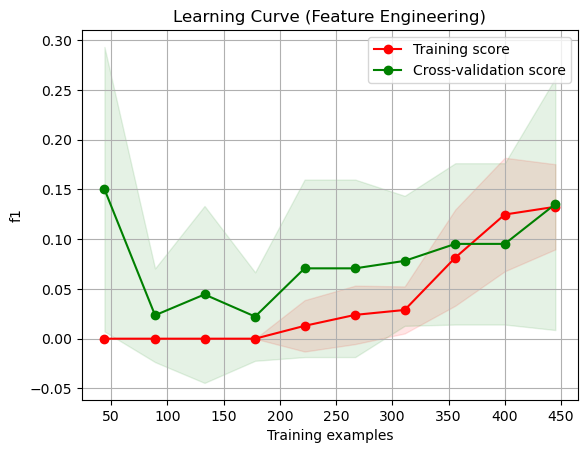

In [10]:
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Pipeline 2: Feature Engineering
def message_length(X):
    return np.array([len(message) for message in X]).reshape(-1, 1)

def exclamation_marks(X):
    return np.array([message.count('!') for message in X]).reshape(-1, 1)

def sparse_message_length(X):
    return csr_matrix(message_length(X))

def sparse_exclamation_marks(X):
    return csr_matrix(exclamation_marks(X))

length_transformer = FunctionTransformer(func=sparse_message_length, validate=False)
exclamation_transformer = FunctionTransformer(func=sparse_exclamation_marks, validate=False)

feature_union = FeatureUnion([("length", length_transformer), ("exclamation", exclamation_transformer)])
X_features = feature_union.fit_transform(X_subset)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_features, y_subset_encoded, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"F1 Score (Feature Engineering): {f1_score(y_test, y_pred, pos_label=le.transform(['spam'])[0])}")

# Plot learning curve
plot_learning_curve(model, X_features, y_subset_encoded, 'Learning Curve (Feature Engineering)')

#### Pipeline 3: Sparse Embeddings (TF-IDF) + Feature Engineering

F1 Score (TF-IDF + Feature Engineering): 0.6


/Users/anxiousviking/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/anxiousviking/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

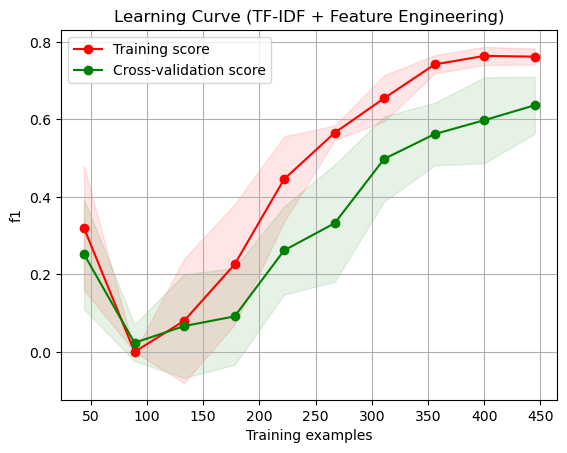

In [11]:
import numpy as np
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Pipeline 3: Sparse Embeddings (TF-IDF) + Feature Engineering
vectorizer = TfidfVectorizer(min_df=5, max_df=0.7, ngram_range=(1, 2))
X_tfidf = vectorizer.fit_transform(X_subset)

length_transformer = FunctionTransformer(func=sparse_message_length, validate=False)
exclamation_transformer = FunctionTransformer(func=sparse_exclamation_marks, validate=False)
X_length = length_transformer.fit_transform(X_subset)
X_exclamation = exclamation_transformer.fit_transform(X_subset)
X_engineered = hstack([X_length, X_exclamation])

# Combine TF-IDF and engineered features
X_combined = hstack([X_tfidf, X_engineered])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_subset_encoded, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"F1 Score (TF-IDF + Feature Engineering): {f1_score(y_test, y_pred, pos_label=le.transform(['spam'])[0])}")

# Plot learning curve
plot_learning_curve(model, X_combined, y_subset_encoded, 'Learning Curve (TF-IDF + Feature Engineering)')


Pipeline 1 (TF-IDF only): F1 Score = 0.555
Pipeline 2 (Feature Engineering only): F1 Score = 0.1
Pipeline 3 (TF-IDF + Feature Engineering): F1 Score = 0.6

Analysis:

Pipeline 1 (TF-IDF only):
This pipeline performs reasonably well with an F1 score of 0.555. TF-IDF captures the term importance and frequency, which is useful for distinguishing spam from ham messages.

Pipeline 2 (Feature Engineering only):
This pipeline performs poorly with an F1 score of 0.1. This suggests that the engineered features alone are not effective for spam detection. Feature engineering in this case may not capture the complexities of spam vs. ham classification.

Pipeline 3 (TF-IDF + Feature Engineering):
This pipeline performs the best with an F1 score of 0.6. Combining TF-IDF with engineered features helps capture both term importance and additional characteristics of the messages, improving classification performance.

Conclusion:

Pipeline 3 is the best choice based on the highest F1 score. It combines the advantages of both TF-IDF and feature engineering, providing a more comprehensive feature set for classification.

In [12]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import FeatureUnion
from scipy.sparse import csr_matrix, hstack

# Define a function to plot learning curves
def plot_learning_curve(model, X, y, title, scoring='f1'):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring=scoring, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title(title)
    plt.xlabel('Training examples')
    plt.ylabel(scoring)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    
    plt.legend(loc='best')
    plt.show()


F1 Score (TF-IDF): 0.8888888888888888


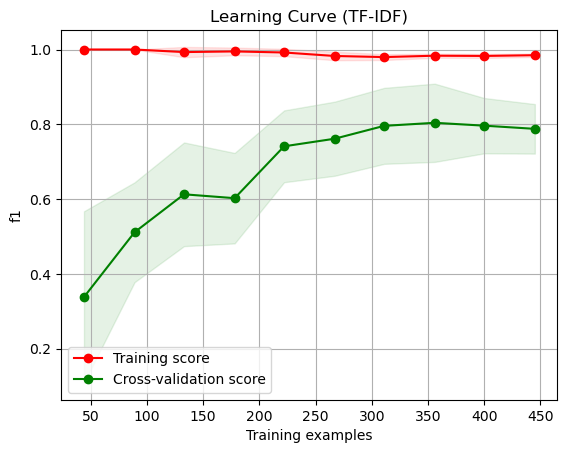

In [13]:
# Load and sample a smaller subset (e.g., 10%)
subset = data.sample(frac=0.1, random_state=42)

# Split data into features and labels
X_subset = subset['message']
y_subset = subset['label']

# Create a label encoder
le = LabelEncoder()
le.fit(y_subset)
y_subset_encoded = le.transform(y_subset)  # Encode labels

# Apply TF-IDF Vectorization
vectorizer = TfidfVectorizer(min_df=5, max_df=0.7, ngram_range=(1, 2))
X_tfidf = vectorizer.fit_transform(X_subset)

# Scale the data
scaler = StandardScaler(with_mean=False)  # with_mean=False for sparse matrices
X_tfidf_scaled = scaler.fit_transform(X_tfidf)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_scaled, y_subset_encoded, test_size=0.2, random_state=42)

# Train model with increased iterations
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"F1 Score (TF-IDF): {f1_score(y_test, y_pred, pos_label=le.transform(['spam'])[0])}")

# Plot learning curve
plot_learning_curve(model, X_tfidf_scaled, y_subset_encoded, 'Learning Curve (TF-IDF)')


F1 Score (Feature Engineering): 0.1


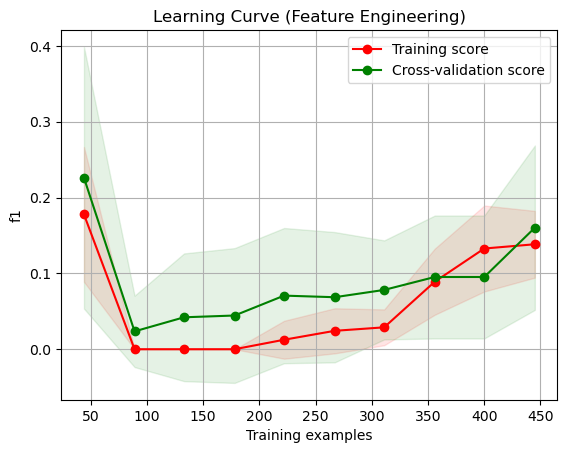

In [14]:
# Define feature extraction functions
def message_length(X):
    return np.array([len(message) for message in X]).reshape(-1, 1)

def exclamation_marks(X):
    return np.array([message.count('!') for message in X]).reshape(-1, 1)

def sparse_message_length(X):
    return csr_matrix(message_length(X))

def sparse_exclamation_marks(X):
    return csr_matrix(exclamation_marks(X))

# Apply feature engineering
length_transformer = FunctionTransformer(func=sparse_message_length, validate=False)
exclamation_transformer = FunctionTransformer(func=sparse_exclamation_marks, validate=False)

feature_union = FeatureUnion([("length", length_transformer), ("exclamation", exclamation_transformer)])
X_features = feature_union.fit_transform(X_subset)

# Scale the data
scaler = StandardScaler(with_mean=False)
X_features_scaled = scaler.fit_transform(X_features)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_features_scaled, y_subset_encoded, test_size=0.2, random_state=42)

# Train model with increased iterations
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"F1 Score (Feature Engineering): {f1_score(y_test, y_pred, pos_label=le.transform(['spam'])[0])}")

# Plot learning curve
plot_learning_curve(model, X_features_scaled, y_subset_encoded, 'Learning Curve (Feature Engineering)')


F1 Score (TF-IDF + Feature Engineering): 0.8888888888888888


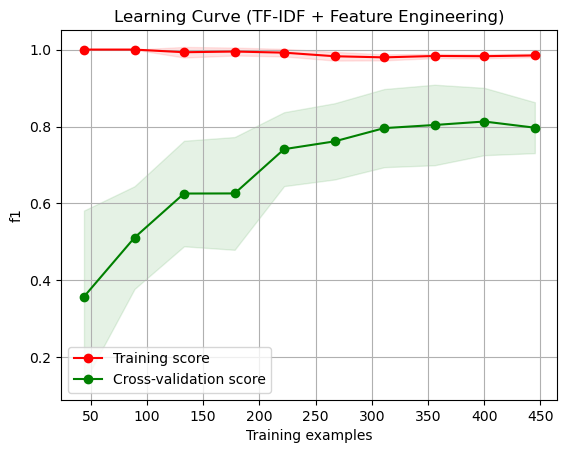

In [15]:
# Apply TF-IDF Vectorization
vectorizer = TfidfVectorizer(min_df=5, max_df=0.7, ngram_range=(1, 2))
X_tfidf = vectorizer.fit_transform(X_subset)

# Apply feature engineering
length_transformer = FunctionTransformer(func=sparse_message_length, validate=False)
exclamation_transformer = FunctionTransformer(func=sparse_exclamation_marks, validate=False)
X_length = length_transformer.fit_transform(X_subset)
X_exclamation = exclamation_transformer.fit_transform(X_subset)
X_engineered = hstack([X_length, X_exclamation])

# Combine TF-IDF and engineered features
X_combined = hstack([X_tfidf, X_engineered])

# Scale the data
scaler = StandardScaler(with_mean=False)
X_combined_scaled = scaler.fit_transform(X_combined)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_combined_scaled, y_subset_encoded, test_size=0.2, random_state=42)

# Train model with increased iterations
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"F1 Score (TF-IDF + Feature Engineering): {f1_score(y_test, y_pred, pos_label=le.transform(['spam'])[0])}")

# Plot learning curve
plot_learning_curve(model, X_combined_scaled, y_subset_encoded, 'Learning Curve (TF-IDF + Feature Engineering)')
